# Example on how to calculate the principal axes of a molecule

This notebook shows how to calculate the principal axes of the molecule (Fig. 1 of the main paper). It uses `ase` and `nglview` only for visualization. The principal component analysis (PCA) is calculated using an off-the-shelf implementation from `scikit-learn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

from ase import Atoms
import nglview as nv

## Visualizing the 3D conformer

The atomic coordinates were calculated using molecular mechanics, as described in the paper. Here, the coordinates are provided for an immediate visualization.

In [2]:
smiles = 'CC[N+](C)(C)CC'
nxyz = np.array([
    [6.0, -2.0366, 0.8406, -0.2439],
    [6.0, -1.1877, -0.1131, 0.5807],
    [7.0, 0.1397, -0.5059, -0.0949],
    [6.0, -0.138, -1.3056, -1.3752],
    [6.0, 0.8961, -1.4392, 0.8604],
    [6.0, 1.0267, 0.6959, -0.4714],
    [6.0, 1.362, 1.6019, 0.702],
    [1.0, -1.5315, 1.793, -0.4248],
    [1.0, -2.9613, 1.0649, 0.2988],
    [1.0, -2.3254, 0.4092, -1.2059],
    [1.0, -0.9454, 0.3309, 1.552],
    [1.0, -1.7389, -1.0428, 0.7652],
    [1.0, -0.5884, -0.6421, -2.1175],
    [1.0, -0.8138, -2.1302, -1.1308],
    [1.0, 0.8141, -1.6915, -1.7526],
    [1.0, 0.3017, -2.3483, 0.9949],
    [1.0, 1.0241, -0.9355, 1.8216],
    [1.0, 1.8662, -1.6801, 0.4162],
    [1.0, 1.9472, 0.2888, -0.9066],
    [1.0, 0.5065, 1.2582, -1.254],
    [1.0, 0.4697, 2.0512, 1.1457],
    [1.0, 1.9152, 1.0759, 1.4844],
    [1.0, 1.9977, 2.4239, 0.3555]
])

In [3]:
at = Atoms(positions=nxyz[:, 1:], numbers=nxyz[:, 0])

In [4]:
nv.show_ase(at)

NGLWidget()

## Obtaining major axes of the molecule

A PCA is performed to the xyz coordinates of the conformer described above. Then, the 2D representation is used to extract the major axes and plotted to be visualized in plane.

In [5]:
pca = IncrementalPCA(2)

In [6]:
uv = pca.fit(nxyz[:, 1:]).transform(nxyz[:, 1:])
axes = uv.max(0) - uv.min(0)
print(axes)

[4.94142946 4.43792541]


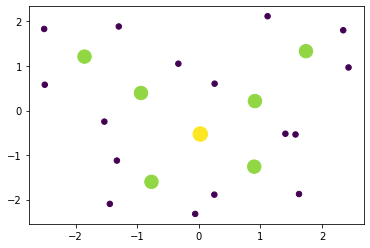

In [7]:
fig, ax = plt.subplots()

ax.scatter(uv[:, 0], uv[:, 1], c=nxyz[:, 0], s=nxyz[:, 0] * 30)
plt.show()